In [32]:
import matplotlib.pyplot as plt
import random
import time

def get_random_reactants(particles, collision_size):
    output = tuple()
    ps = particles[::]
    total = sum(ps)
    species = len(ps)
    
    for _ in range(collision_size):
        choice = random.randrange(total)
        for s in range(species):
            choice -= ps[s]
            if choice < 0:
                ps[s] -= 1
                total -= 1
                output += s,
                break
    
    return output

In [37]:
particles = [200, 10, 0, 0]
species = len(particles)
total = sum(particles)
collision_size = 3

print(f"{particles = }")
print(f"{collision_size = }")
for trial in range(10):
    print(get_random_reactants(particles, collision_size))

particles = [200, 10, 0, 0]
collision_size = 3
(0, 1, 0)
(0, 0, 0)
(0, 0, 0)
(1, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


In [38]:
def xor3(x, y):
    if x == y:
        return x, x
    else:
        a = 3 - (x + y)
        return a, a

In [39]:
for i in range(3):
    for j in range(3):
        print(f"xor3({i}, {j}) = {xor3(i, j)}")

xor3(0, 0) = (0, 0)
xor3(0, 1) = (2, 2)
xor3(0, 2) = (1, 1)
xor3(1, 0) = (2, 2)
xor3(1, 1) = (1, 1)
xor3(1, 2) = (0, 0)
xor3(2, 0) = (1, 1)
xor3(2, 1) = (0, 0)
xor3(2, 2) = (2, 2)


In [48]:
def program(start_pop, f, frequency=20, cycles=50):
    particles = start_pop[::]
    collision_size = f.__code__.co_argcount

    species = len(particles)
    total = sum(particles)

    data = [[0 for _ in range(cycles+1)] for _ in range(species)]
    data[0][0] = particles[0]/total*100
    for s in range(1,species):
        data[s][0] = data[s-1][0] + particles[s]/total*100

    for c in range(1, cycles+1):
        for _ in range(frequency):
            reactants = get_random_reactants(particles, collision_size)
            for r in reactants:
                particles[r] -= 1

            products = f(*reactants)
            for p in products:
                particles[p] += 1

        total = sum(particles)
        
        data[0][c] = particles[0]/total*100
        for s in range(1,species):
            data[s][c] = data[s-1][c] + particles[s]/total*100
    
    
    plt.title(f'{start_pop = }\nf = {f.__name__}\n{frequency = }')
    plt.xlabel('time (units)')
    plt.ylabel('population percentage (%)')
    plt.xlim(0, cycles)
    plt.ylim(0, 100)

    x = [i for i in range(cycles+1)]

    plt.fill_between(x, 0, data[0])
    for s in range(1,species):
        plt.fill_between(x, data[s-1], data[s])

    plt.show()

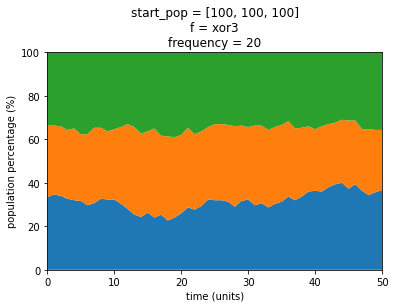

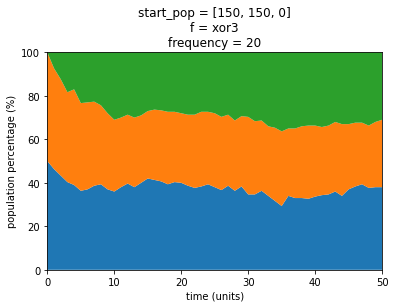

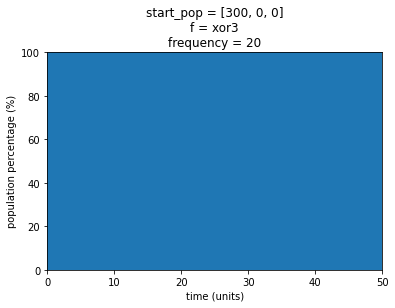

In [49]:
program([100, 100, 100], xor3)
program([150, 150, 0], xor3)
program([300, 0, 0], xor3)
#program([1000, 1000, 1000], xor3, frequency=200)
#program([1500, 1500, 0], xor3, frequency=200)
#program([3000, 0, 0], xor3, frequency=200)

In [50]:
def xorn(N):
    def f(x, y):
        if (x+y)%2 == 0:
            a = (x+y)//2
        else:
            a = ((x+y+N)//2)%N
        return (a,a)
    
    f.__name__ = "xorn("+str(N)+")"
    return f

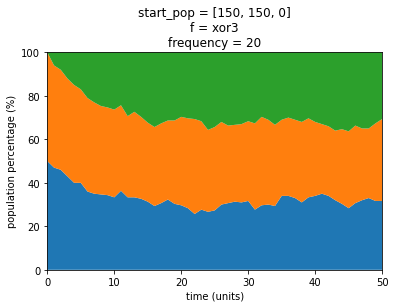

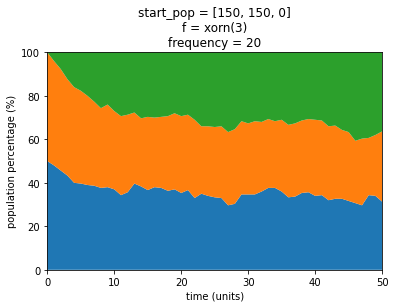

In [51]:
program([150, 150, 0], xor3)
program([150, 150, 0], xorn(3))

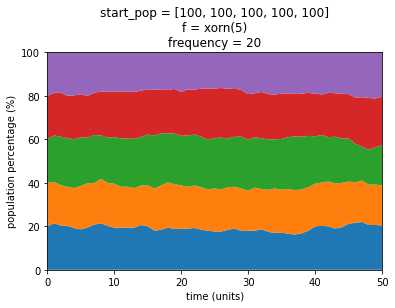

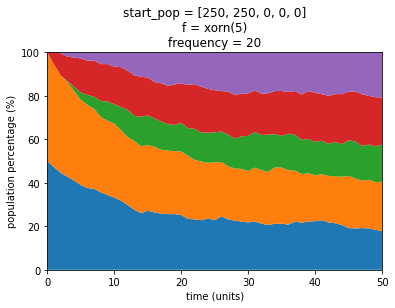

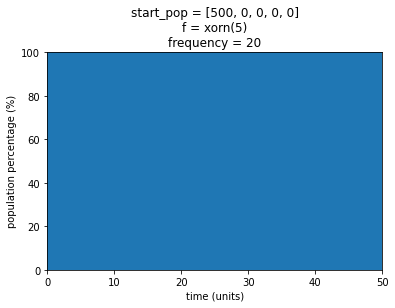

In [52]:
xor5 = xorn(5)
program([100]*5, xor5)
program([250]*2+[0]*3, xor5)
program([500]+[0]*4, xor5)

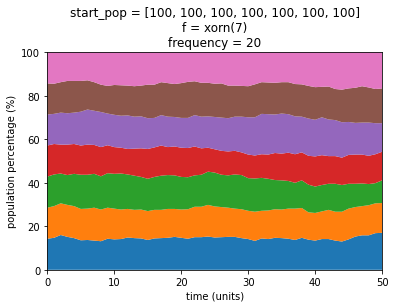

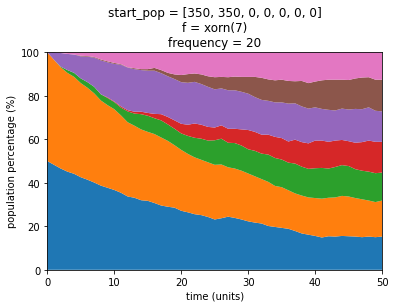

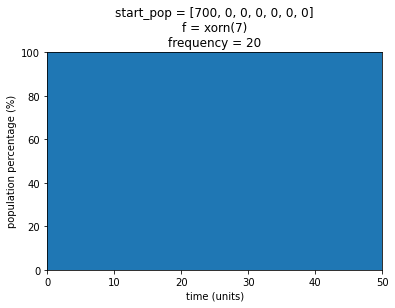

In [53]:
xor7 = xorn(7)
program([100]*7, xor7)
program([350]*2+[0]*5, xor7)
program([700]+[0]*6, xor7)

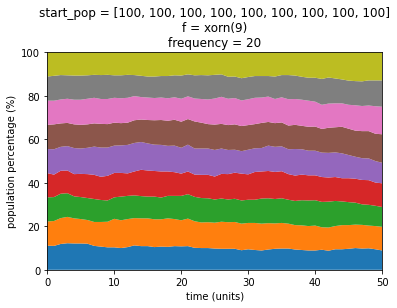

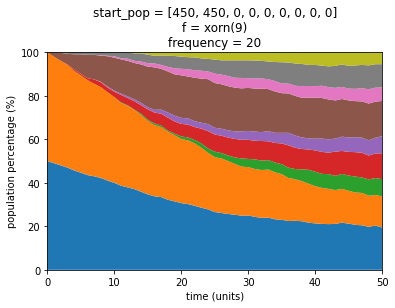

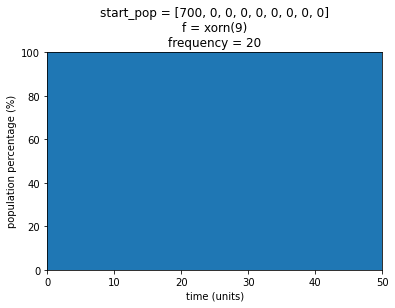

In [54]:
xor9 = xorn(9)
program([100]*9, xor9)
program([450]*2+[0]*7, xor9)
program([700]+[0]*8, xor9)

In [68]:
def program2(start_pop, f, frequency=20, cycles=50):
    particles = start_pop[::]
    collision_size = f.__code__.co_argcount

    species = len(particles)
    total = sum(particles)

    data = [[0 for _ in range(cycles+1)] for _ in range(species)]
    data[0][0] = particles[0]
    for s in range(1,species):
        data[s][0] = data[s-1][0] + particles[s]
    
    max_total = total

    for c in range(1, cycles+1):
        for _ in range(frequency):
            if total >= collision_size:
                reactants = get_random_reactants(particles, collision_size)
                for r in reactants:
                    particles[r] -= 1

                products = f(*reactants)
                for p in products:
                    particles[p] += 1

                total = sum(particles)
        
        if total > max_total:
            max_total = total
        

        data[0][c] = particles[0]
        for s in range(1,species):
            data[s][c] = data[s-1][c] + particles[s]
    
    
    plt.title(f'{start_pop = }\nf = {f.__name__}\n{frequency = }')
    plt.xlabel('time (units)')
    plt.ylabel('population')
    plt.xlim(0, cycles)
    plt.ylim(0, max_total)

    x = [i for i in range(cycles+1)]

    plt.fill_between(x, 0, data[0])
    for s in range(1,species):
        plt.fill_between(x, data[s-1], data[s])

    plt.show()

In [56]:
def double(x):
    return (x,x)

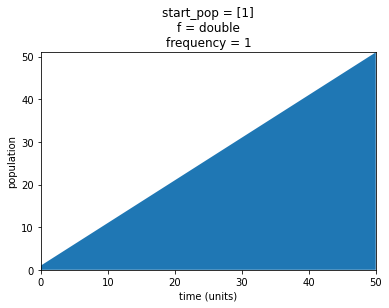

In [57]:
program2([1], double, frequency=1)

In [69]:
def fox_n_rabbit(x,y):
    if x == y == 0:
        return (0,0,0,0)
    if x == y == 1:
        return tuple()
    return (1,1)

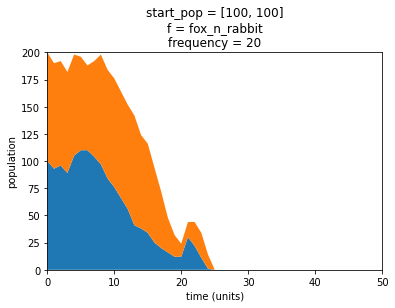

In [71]:
program2([100,100], fox_n_rabbit)

In [60]:
def bigger_fish(x,y):
    if x == y == 0:
        return (0,0,0,0)
    if x == y:
        return tuple()
    m = min(x,y)
    M = max(x,y)
    if M == m+1:
        return (M,M)
    return (m,)

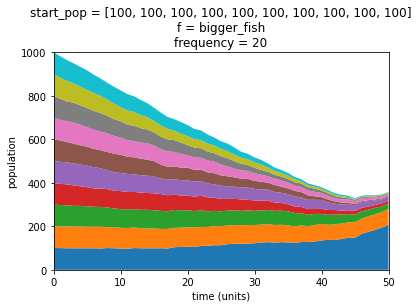

In [67]:
program2([100,100,100,100,100,100,100,100,100,100], bigger_fish)

In [84]:
def buffalo_n_lions(a,b,c,d,e):
    animals = [0,0]
    for p in [a,b,c,d,e]:
        animals[p] += 1
    
    if animals[1] == 5:
        return tuple()
    if animals[0] > animals[1]:
        return (0,) * animals[0]*2
    return (1,) * animals[1]*2

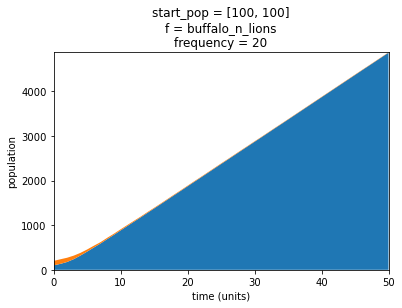

In [102]:
program2([100,100], buffalo_n_lions)

In [115]:
def rps(x,y):
    if x==y:
        return (x,y)
    m = min(x,y)
    M = max(x,y)
    if m==0:
        if M==1:
            return (1,1)
        if M==2:
            return (0,0)
    if m==1:
        return (2,2)

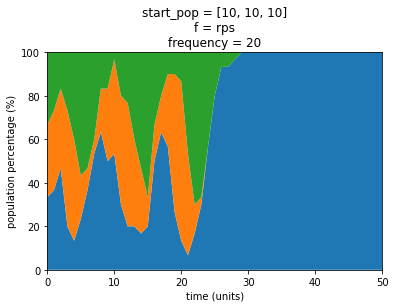

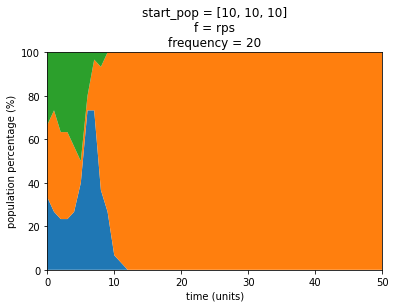

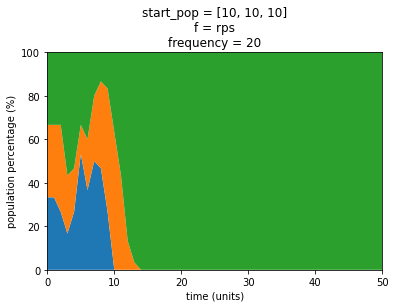

In [124]:
program([10,10,10], rps)
program([10,10,10], rps)
program([10,10,10], rps)